### **Mass downloader**

In [1]:
import obspy
from obspy.clients.fdsn.mass_downloader import RectangularDomain, \
    Restrictions, MassDownloader
from obspy.clients.fdsn import Client
from obspy import read, read_inventory
import cartopy
import shutil
import os

if os.path.isdir("stations"):
    shutil.rmtree("stations")
    shutil.rmtree("waveforms")
domain = RectangularDomain(minlatitude=-19.0982, maxlatitude=2.11118,
                           minlongitude=113.1521, maxlongitude=141.1678)
starttime=obspy.UTCDateTime("2014-04-01 00:00:00")
endtime  =obspy.UTCDateTime("2014-04-01 00:00:10")
restrictions = Restrictions(
    starttime=starttime,
    endtime=endtime,
    # Chunk it to have one file per day.
    chunklength_in_sec=86400,
    # If the location code is specified, the location priority list is not
    # used; the same is true for the channel argument and priority list.
    # network="*", station="*", location="", channel="*Z",
    network="*", station="*", location_priorities=["", "00", "10"], channel_priorities=["BHZ", "SHZ", "HHZ"],
    reject_channels_with_gaps=False,
    minimum_length=0.0,
    minimum_interstation_distance_in_m=100.0, )
mdl = MassDownloader(providers=["IRIS", "GFZ"])
mdl.download(domain, restrictions, mseed_storage="waveforms",
             stationxml_storage="stations");

[2023-06-01 19:43:31,643] - obspy.clients.fdsn.mass_downloader - INFO: Initializing FDSN client(s) for IRIS, GFZ.


XMLSyntaxError: Document is empty, line 1, column 1 (<string>, line 1)

### **Review station location**

/home/x/miniconda3/envs/obspy/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1.2, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/x/miniconda3/envs/obspy/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1.2, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/x/miniconda3/envs/obspy/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1.2, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/x/miniconda3/envs/obspy/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1.2, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.wa

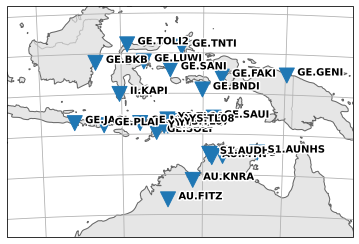

In [26]:
inv = read_inventory('stations/*')
fig = inv.plot('local', 'i', method='cartopy', color='tab:blue');

### **Write data for pygmt ploting stations**

In [31]:
# import numpy as np
inv = read_inventory('stations/*')
file = open("coordinate.txt", "w")
file.write("code,latitude,longitude\n")
for i in range(len(inv)):
    latitude  = inv.networks[i].stations[0].latitude
    longitude = inv.networks[i].stations[0].longitude
    netcode = inv.networks[i].code
    stacode = inv.networks[i].stations[0].code
    file.write(netcode+"."+stacode+",%f,%f" %(latitude, longitude)+"\n")

/home/x/miniconda3/envs/obspy/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1.2, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/x/miniconda3/envs/obspy/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1.2, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/x/miniconda3/envs/obspy/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1.2, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/x/miniconda3/envs/obspy/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1.2, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.wa

### **Remove reponse**

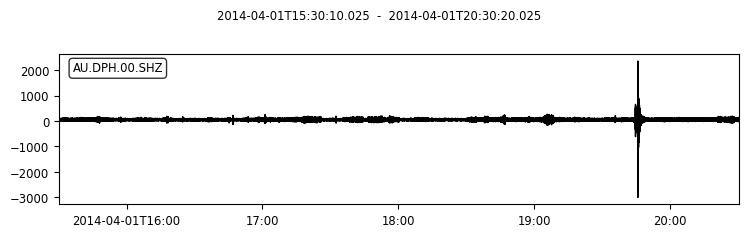

1 Trace(s) in Stream:
AU.DPH.00.SHZ | 2014-04-01T15:30:10.025000Z - 2014-04-01T20:30:20.025000Z | 20.0 Hz, 360201 samples

In [22]:
str1 = read("waveforms/AU.DPH.00.SHZ__20140401T000000Z__20140402T000000Z.mseed")
str = str1.copy()
starttime=obspy.UTCDateTime("2014-04-01T15:30:10")
endtime=obspy.UTCDateTime("2014-04-01T20:30:20")
str.trim(starttime=starttime, endtime=endtime)
str.plot();
# inv = read_inventory("stations/GE.TOLI2.xml")
# str.remove_response(inventory=inv, output="DISP")
# str.plot();
str